# Static Stack Usage Survey

Here are the results of my static analysis of popular open source applications' stack memory usage.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

data_dir = Path('data')
test_data_1_csv = data_dir / 'test_data_1.csv'
test_data_2_csv = data_dir / 'test_data_2.csv'

# Data we will be analysing
grep_csv = data_dir / 'grep_analysis.csv'

test_data_1 = pd.read_csv(test_data_1_csv.resolve(), sep=';')
test_data_2 = pd.read_csv(test_data_2_csv.resolve(), sep=';')

grep_data = pd.read_csv(grep_csv.resolve(), sep=';')


In [23]:
def show_cumulative_histogram_of_stack_allocation_sizes(df):
    df["TotalAllocatedStackMemory"].hist()
    
def get_cumulative_histogram(series):
    N = series.count()
    x = series_sorted = np.sort(series)
    y = np.arange(N) / N  # TODO: Correct so that the final value is 100% not 1-(1/N)
    return x, y

def plot_histograms(df):
    total_allocations = df["TotalAllocatedStackMemory"]
    escaping_only = df["TotalEscapingAllocatedStackMemory"]
    
    x_total, y_total = get_cumulative_histogram(total_allocations)
    x_escaping, y_escaping = get_cumulative_histogram(escaping_only)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
#     fig.suptitle("Cumulative histogram of static stack allocation sizes")
    
    total_allocations_plot = ax1.plot(x_total, 100 * y_total)
    ax1.set_title("All allocations")
    ax1.set(xlabel="Size (Bytes)")
    ax1.set(ylabel="Percentage (%)")
    
    escaping_allocations_plot = ax2.plot(x_escaping, 100 * y_escaping, 'tab:red')
    ax2.set_title("Escaping allocations")
    ax2.set(xlabel="Size (Bytes)")
    ax2.set(ylabel="Percentage (%)")
    
    total_allocations_log_plot = ax3.plot(x_total, 100 * y_total)
    ax3.set_title("All allocations (log scale)")
    ax3.set(xlabel="Size (Bytes, logarithmic)")
    ax3.set_xscale('log')
    ax3.set(ylabel="Percentage (%)")
    
    escaping_allocations_log_plog = ax4.plot(x_escaping, 100 * y_total, 'tab:red')
    ax4.set_title("Escaping allocations (log scale)")
    ax4.set(xlabel="Size (Bytes, logarithmic)")
    ax4.set_xscale('log')
    ax4.set(ylabel="Percentage (%)")
    
    fig.show()
    
    

## Tool 1: Grep
The first tool to analyse is Grep, the Unix command line tool for searching files for lines matching a passed regex.

Here's a snippet of some of the data. I decompiled the binary included with my Ubuntu 20.04 install - soon I plan to swap this for a proper compilation of the actual source code.

In [24]:
grep_data

,FileName,FunctionName,NumStackAllocations,NumEscapingStackAllocations,TotalAllocatedStackMemory,TotalEscapingAllocatedStackMemory
0,test,function_4000,0,0,0,0
1,test,function_4003,1,0,8,0
2,test,function_46a0,0,0,0,0
3,test,function_46a3,0,0,0,0
4,test,function_46b0,0,0,0,0
...,...,...,...,...,...,...
766,test,__decompiler_undefined_function_3,0,0,0,0
767,test,__decompiler_undefined_function_5,0,0,0,0
768,test,__decompiler_undefined_function_7,0,0,0,0
769,test,__decompiler_undefined_function_8,0,0,0,0


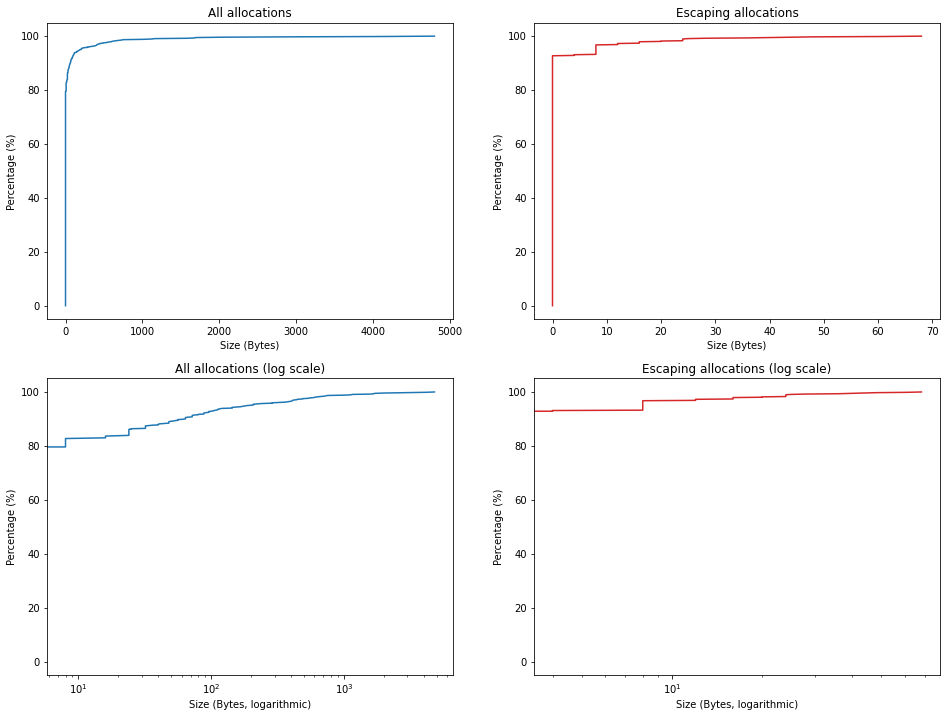

In [25]:
plot_histograms(grep_data)